In [54]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [29]:
(x_train, y_train), (x_test, y_test) = load_data()

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [31]:
# Loading TF
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Activation

In [42]:
model = Sequential() # Blank Model or Empty Model
model.add(Conv2D(filters=3,kernel_size=(5,5), strides = (1,1), padding='same'))
model.add(Activation("relu"))# 28x28x3
model.add(MaxPooling2D(pool_size=(2,2))) # 14x14x3
model.add(Flatten()) # 588
model.add(Dense(10,activation="softmax"))


In [35]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [41]:
'''(10000, 28, 28, 3) - Example
10000 = # Images / Batch size
28, 28 = Size of the each channel in the image (height x width)
3 = # Channels
'''
x_train = x_train.reshape(60000, 28, 28, 1).astype(float)
x_test = x_test.reshape(10000, 28, 28, 1).astype(float)

In [43]:
# Model Compilation
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy", 
              metrics = "accuracy")

In [44]:
# Model Train
history = model.fit(x=x_train, y=y_train_ohe, epochs = 10, 
                    batch_size= 2500, validation_data = (x_test,y_test_ohe))

Epoch 1/10
24/24 [==============================] - 6s 260ms/step - loss: 59.7085 - accuracy: 0.1965 - val_loss: 22.0536 - val_accuracy: 0.3784
Epoch 2/10
24/24 [==============================] - 6s 249ms/step - loss: 14.1225 - accuracy: 0.5236 - val_loss: 8.1404 - val_accuracy: 0.6588
Epoch 3/10
24/24 [==============================] - 6s 253ms/step - loss: 6.9189 - accuracy: 0.7064 - val_loss: 5.0787 - val_accuracy: 0.7673
Epoch 4/10
24/24 [==============================] - 6s 252ms/step - loss: 4.8347 - accuracy: 0.7735 - val_loss: 3.8957 - val_accuracy: 0.8125
Epoch 5/10
24/24 [==============================] - 6s 256ms/step - loss: 3.8350 - accuracy: 0.8078 - val_loss: 3.2200 - val_accuracy: 0.8365
Epoch 6/10
24/24 [==============================] - 6s 254ms/step - loss: 3.2024 - accuracy: 0.8295 - val_loss: 2.7760 - val_accuracy: 0.8495
Epoch 7/10
24/24 [==============================] - 6s 259ms/step - loss: 2.7573 - accuracy: 0.8456 - val_loss: 2.4417 - val_accuracy: 0.8623
Epo

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (2500, 28, 28, 3)         78        
_________________________________________________________________
activation_4 (Activation)    (2500, 28, 28, 3)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (2500, 14, 14, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (2500, 588)               0         
_________________________________________________________________
dense_4 (Dense)              (2500, 10)                5890      
Total params: 5,968
Trainable params: 5,968
Non-trainable params: 0
_________________________________________________________________


https://poloclub.github.io/cnn-explainer/

### Predictions

In [26]:
import numpy as np

In [45]:
preds = model.predict(x_test)

In [46]:
preds.shape

(10000, 10)

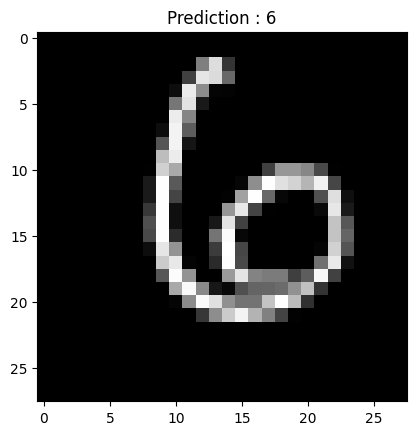

In [55]:
img_num = 100

plt.imshow(x_test[img_num].reshape(28,28), cmap="gray")
plt.title(f'Prediction : {np.argmax(preds[img_num])}')
plt.show()